In [4]:
from scipy import stats
import numpy as np
from statsmodels.stats import multitest
import matplotlib.pyplot as plt

### Without multiple comparisons correction

In [5]:
count = 0
n_tests = 10000
mu, sigma = 0, 1

for _ in range(n_tests):
    
    a = np.random.normal(mu, sigma, 1000)
    b = np.random.normal(mu, sigma, 1000)
    # Test null that two populations have the same mean
    pval = stats.ttest_ind(a, b)[1]
    if pval < 0.05:
        count += 1

f'{(count / n_tests * 100)}% of nulls rejected'

'4.8500000000000005% of nulls rejected'

## With  Benjamini/Hochberg correction

In [2]:
mu, sigma = 5, 2
n_tests = 10000
pvals = []
for _ in range(n_tests):
    
    a = np.random.normal(mu, sigma, 100)
    b = np.random.normal(mu, sigma, 100)
    # Test null that two populations have the same mean
    pvals.append(stats.ttest_ind(a, b)[1])
    
reject, correct_pval, _, _ = multitest.multipletests(pvals, alpha=0.5, method='fdr_bh', 
                                                     is_sorted=False, returnsorted=False)

f'{sum(reject) / len(reject) * 100}% of nulls rejected'

'0.0% of nulls rejected'

Text(0, 0.5, '% nulls rejected')

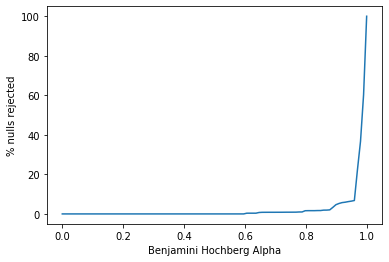

In [6]:
x_range = np.linspace(1e-5, 1, 100)

percent_pass = []
for alpha in x_range:
    reject, correct_pval, _, _ = multitest.multipletests(pvals, alpha=alpha, method='fdr_bh', 
                                                         is_sorted=False, returnsorted=False)
    percent_pass.append(sum(reject) / len(reject) * 100)

plt.plot(x_range, percent_pass)
plt.xlabel('Benjamini Hochberg Alpha')
plt.ylabel('% nulls rejected')